# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Cleaning

In [2]:
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Documents\Hackathon\IndustriAI\Industry-Baby\archive\train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
# Duplicate check
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
        
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [5]:
# dropping unnecessary columns for modelling
df = df.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

In [6]:
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Map the target variable using the defined mapping
df['Credit_Score'] = df['Credit_Score'].map(target_mapping)

In [7]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)] 

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,4.000,,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2
8,28,,34847.84,2,4,6,1,3,4,2.000,Good,605.03,24.464,26 Years and 7 Months,No,18.816,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,1
10,28,Teacher,34847.84,2,1385,6,1,3,-1,2.000,,605.03,33.225,26 Years and 9 Months,No,18.816,58.51597569589465,HighspentLargevaluepayments,466.46647639764313,1
16,34,,143162.64,1,5,8,3,5,8,3.000,Good,1303.01,28.617,17 Years and 9 Months,No,246.992,168.413702679309,!@9#%8,1043.3159778669492,2
18,34,,143162.64,1,5,8,3,8,7,NaN,Good,1303.01,26.520,17 Years and 11 Months,No,246.992,10000,HighspentSmallvaluepayments,715.741367403555,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,28,,20002.88,10,8,29,5,33,25,9.000,Bad,3571.7,33.360,6 Years and 1 Months,Yes,60.965,74.36660309585342,!@9#%8,307.659,1
99992,24,Mechanic,39628.99,4,6,7,2,23,NaN,3.000,,502.38,32.991,31 Years and 3 Months,No,35.104,401.1964806036356,LowspentSmallvaluepayments,189.641,0
99994,25,Mechanic,39628.99,4,6,7,2,20,6,3.000,,502.38,39.324,31 Years and 5 Months,No,35.104,140.58140274528395,HighspentMediumvaluepayments,410.256,0
99995,25,Mechanic,39628.99,4,6,7,2,23,7,3.000,,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,HighspentLargevaluepayments,479.866,0


In [8]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [9]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7,4.000,NaN,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2
1,23,Scientist,19114.12,3,4,3,4,-1,NaN,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,2
2,-500,Scientist,19114.12,3,4,3,4,3,7,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,2
3,23,Scientist,19114.12,3,4,3,4,5,4,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,2
4,23,Scientist,19114.12,3,4,3,4,6,NaN,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,2


In [10]:
df.shape

(100000, 20)

In [11]:
df.isna().sum()

Age                             0
Occupation                   7062
Annual_Income                   0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000
Credit_Score,100000.000,0.888,0.675,0.000,0.000,1.000,1.000,2.000


In [13]:
df.describe(include='object').T

,count,unique,top,freq
Age,100000,1728,38,2994
Occupation,92938,15,Lawyer,6575
Annual_Income,100000,13487,17816.75,16
Num_of_Loan,100000,414,3,15104
Num_of_Delayed_Payment,92998,711,19,5481
Credit_Mix,79805,3,Standard,36479
Outstanding_Debt,100000,12203,1109.03,24
Credit_History_Age,90970,404,15 Years and 11 Months,446
Payment_of_Min_Amount,100000,3,Yes,52326
Amount_invested_monthly,95521,91049,10000,4305


## Find and Change wrong/missing values

### Age

In [14]:
df.Age.nunique()

1728

In [15]:
df.Age.value_counts(ascending=False).head(10)

Age
38    2994
28    2968
31    2955
26    2945
32    2884
36    2868
35    2866
25    2861
27    2859
39    2846
Name: count, dtype: int64

In [16]:
import re

def non_numeric_values(df, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'
    
    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values

unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)


{'-'}


In [17]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df[df['Age'] < 0]['Age'].unique()

array([-500], dtype=int64)

In [18]:
df[df['Age'] > 100]['Age'].unique()

array([7580,  181,  995, ..., 4808, 2263, 1342], dtype=int64)

In [19]:
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

In [20]:
df.shape

(97224, 20)

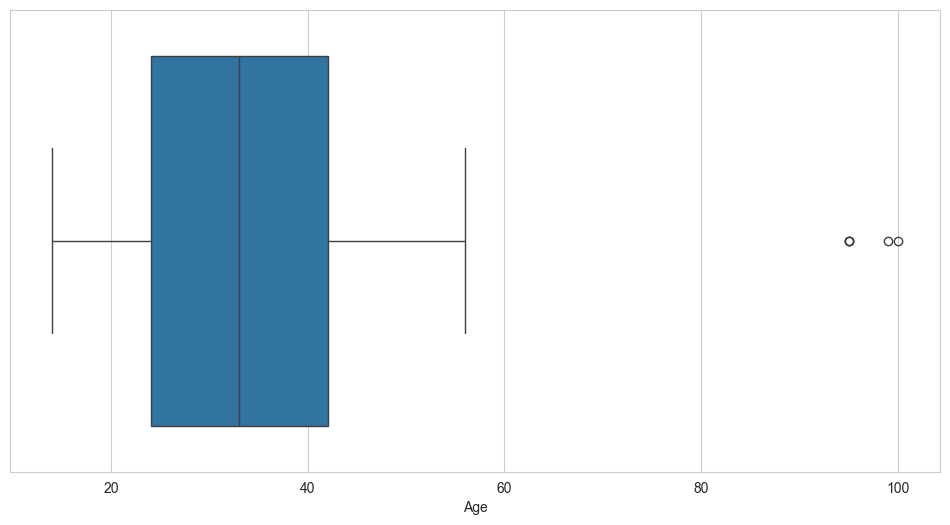

In [21]:
sns.boxplot(data= df, x= df.Age);

### Occupation

In [22]:
df.Occupation.value_counts()

Occupation
Lawyer          6389
Architect       6175
Engineer        6172
Scientist       6113
Accountant      6110
Mechanic        6099
MediaManager    6068
Teacher         6049
Developer       6031
Entrepreneur    6015
Doctor          5916
Journalist      5906
Manager         5807
Musician        5760
Writer          5741
Name: count, dtype: int64

In [23]:
df.Occupation.isna().sum()

6873

In [24]:
df.loc[pd.isna(df['Occupation']), 'Occupation'] = 'Other'

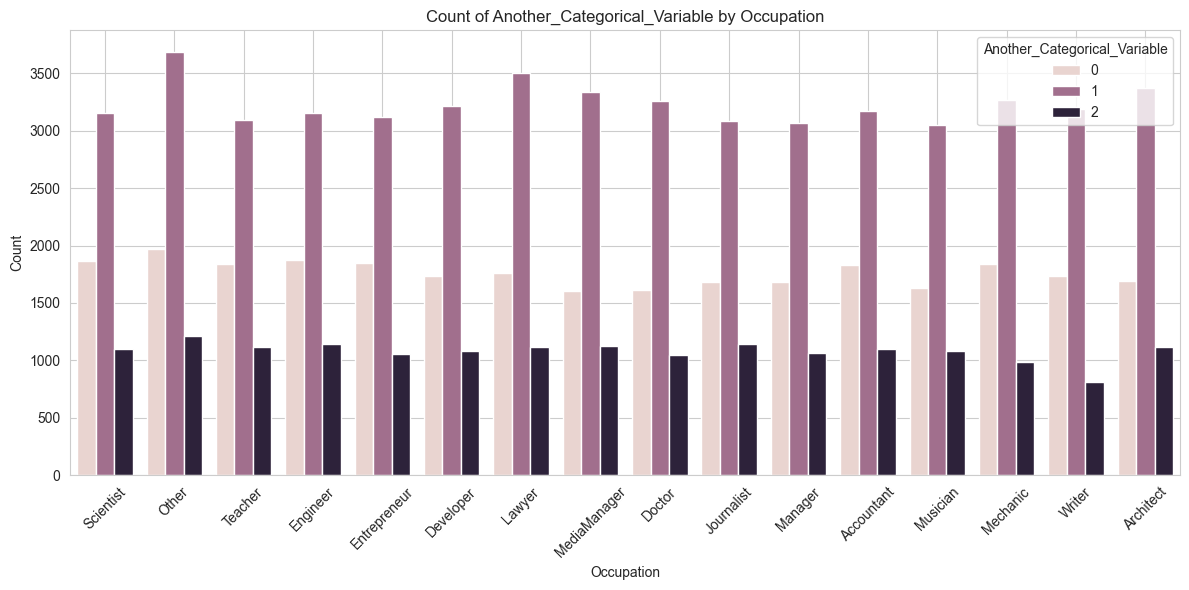

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

### Num_Bank_Accounts

In [26]:
non_numeric_values(df, 'Num_Bank_Accounts')

{'-'}

In [27]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()

21

In [28]:
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)

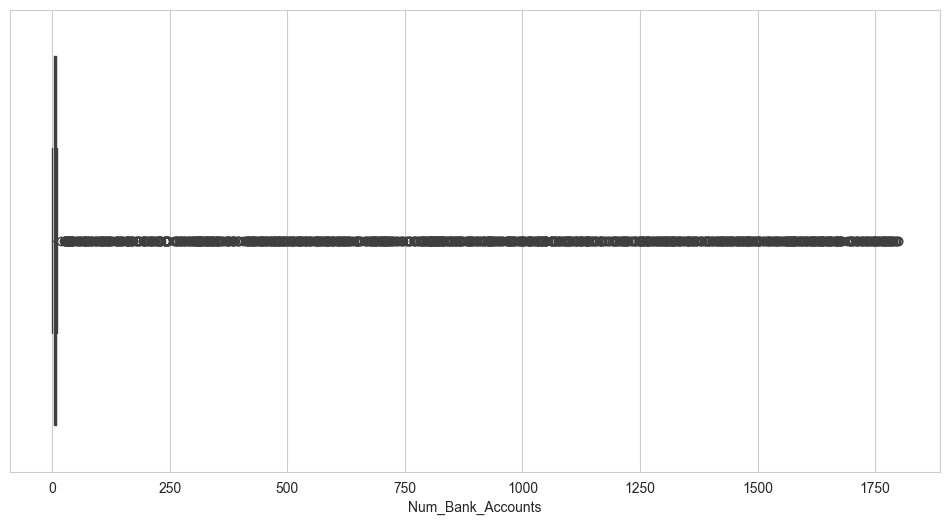

In [29]:
sns.boxplot(data= df, x = df.Num_Bank_Accounts);

### Num_of_Loan

In [30]:
non_numeric_values(df, 'Num_of_Loan')

{'-'}

In [31]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100], dtype=int64)

In [32]:
df['Num_of_Loan'].unique()

array([   4,    1,    3,  967, -100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352, 1017,  945,  146,  563,  341,  720, 1485,
         49,  737, 1106,  466,  728,  313,  597,  119,  663,  640,   92,
       1019,  501, 1302,   39,  716,  848,  931, 1214,  186,  424, 1001,
       1110, 1152,  457, 1433, 1187,   52, 1480, 1047, 1035, 1347,   33,
        193,  699,  329, 1451,  484,  649,  995,  545,  684, 1135, 1094,
       1204,  654,   58,  348,  614, 1363,  323, 1406, 1348,  430,  153,
       1461,  905, 1312, 1424, 1154,   95, 1353, 1228,  819, 1006,  795,
        359, 1209,  590,  696, 1185, 1465,  911,   70,  816, 1369,  143,
       1416,  455,   55, 1096, 1474,  420,  904,   89, 1259,  527, 1241,
        449,  983,  418,  319,   23,  238,  638,  138,  235,  280, 1070,
       1484,  274,  494, 1459,  404, 1354, 1495, 1391,  601, 1313, 1319,
        898,  231,  752,  174,  961, 1046,  834,  284,  438,  288, 1463,
       1151,  719,  198, 1015,  855,  841,  392, 14

In [33]:
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() # cannot be negative, dropping them

3770

In [34]:
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.shape

(93433, 20)

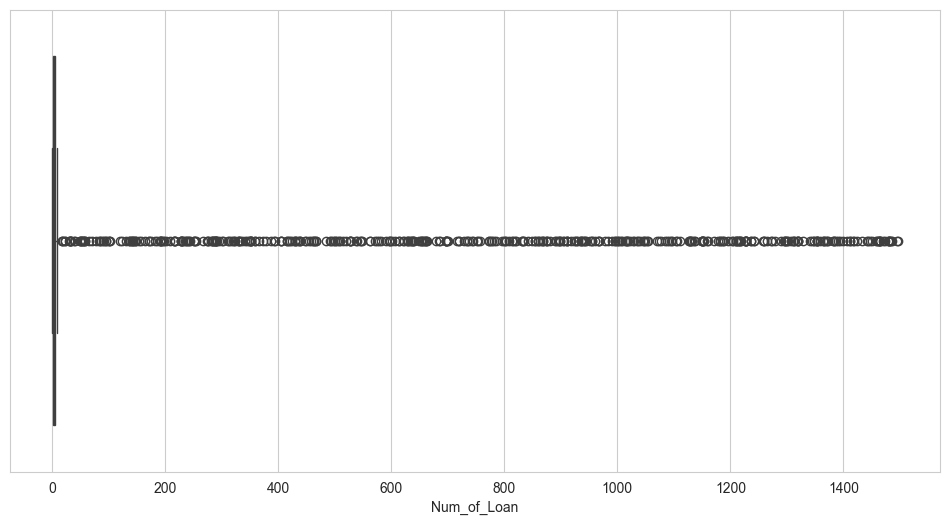

In [35]:
sns.boxplot(data= df, x = df.Num_of_Loan);

### Delay_from_due_date

In [36]:
non_numeric_values(df, 'Delay_from_due_date')

{'-'}

In [37]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()  # not possible

array([-1, -2, -3, -5, -4], dtype=int64)

In [38]:
df['Num_of_Loan'].nunique()

398

In [39]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count()

547

In [40]:
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
df.shape

(92886, 20)

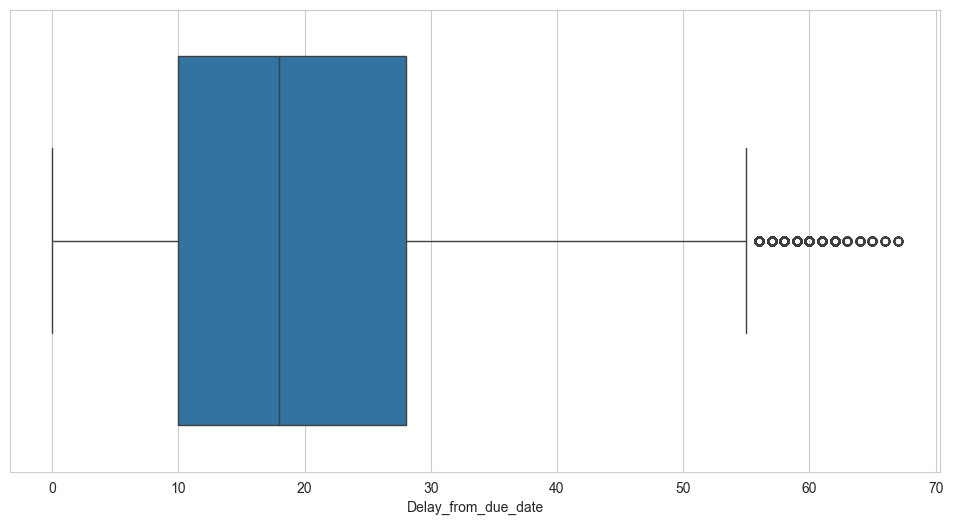

In [41]:
sns.boxplot(data= df, x = df.Delay_from_due_date);

### Num_of_Delayed_Payment

In [42]:
non_numeric_values(df, 'Num_of_Delayed_Payment')

{'-', 'nan'}

In [43]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [44]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

592

In [45]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.shape

(92294, 20)

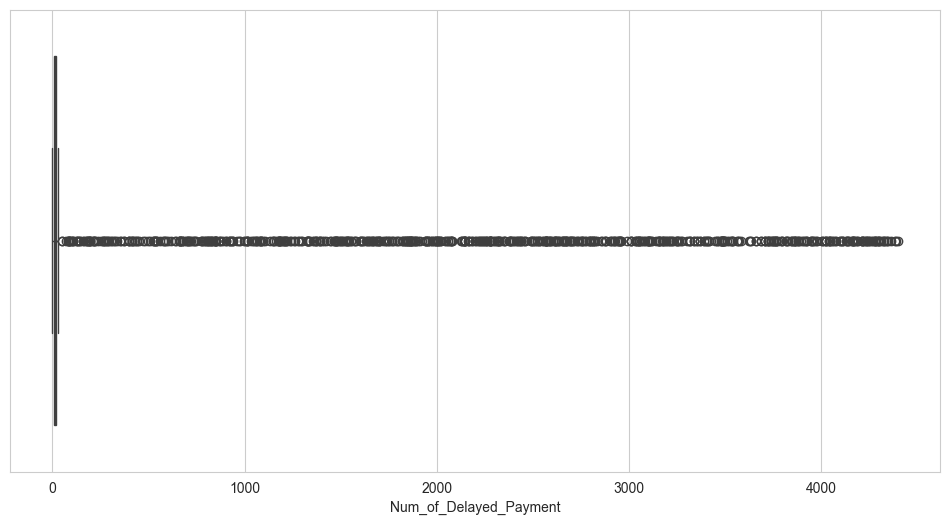

In [46]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment'].dropna());

In [47]:
df['Num_of_Delayed_Payment'].value_counts().head(10)

Num_of_Delayed_Payment
17.000    5080
19.000    5065
16.000    4951
10.000    4941
15.000    4888
18.000    4876
20.000    4761
12.000    4717
9.000     4617
8.000     4518
Name: count, dtype: int64

In [48]:
from sklearn.impute import KNNImputer

def knn_impute_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    df (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """

    # Extract the column to be imputed
    column_to_impute = df[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)

    # Replace the original column with the imputed values
    df[column_name] = column_imputed

    return df


In [49]:
df = knn_impute_column(df, 'Num_of_Delayed_Payment')

# to specify the number of neighbors:
# df = knn_impute_column(df, 'Num_of_Delayed_Payment', n_neighbors=10)

In [50]:
df['Num_of_Delayed_Payment'].isna().sum()

0

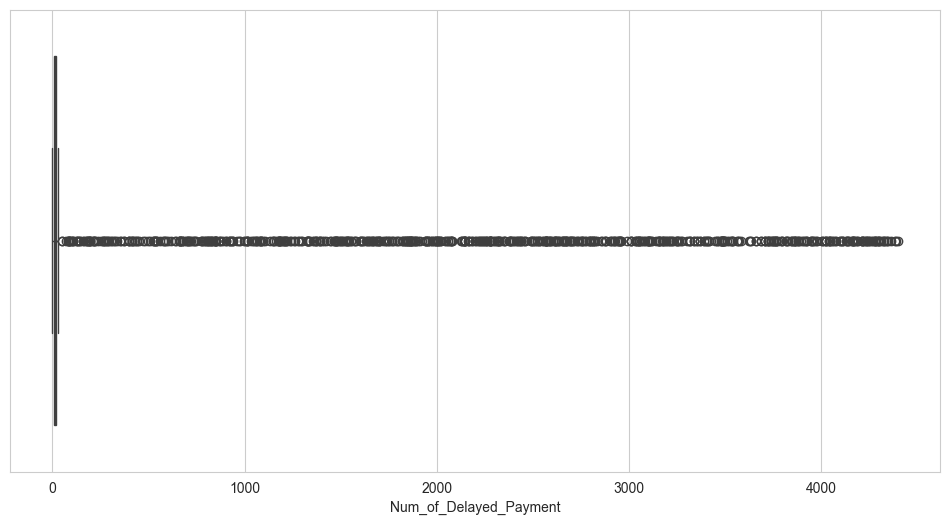

In [51]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment']);

### Num_Credit_Inquiries

In [52]:
non_numeric_values(df, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [53]:
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

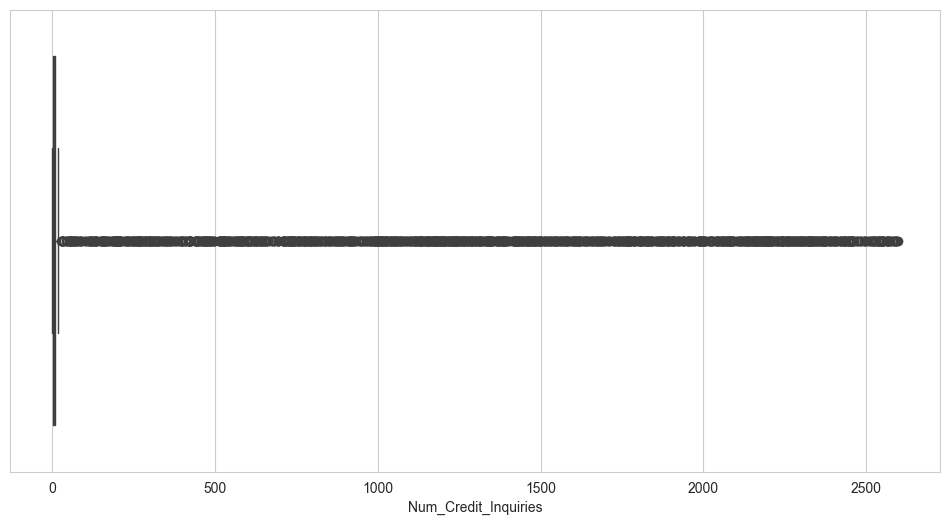

In [54]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries'].dropna());

In [55]:
df['Num_Credit_Inquiries'].isna().sum()

1810

In [56]:
df['Num_Credit_Inquiries'].nunique()

1160

In [57]:
df['Num_Credit_Inquiries'].value_counts().head(10)

Num_Credit_Inquiries
4.000    10314
3.000     8103
6.000     7560
7.000     7516
8.000     7311
2.000     7290
1.000     6889
0.000     6364
5.000     5277
9.000     4932
Name: count, dtype: int64

In [58]:
df = knn_impute_column(df, 'Num_Credit_Inquiries')
df['Num_Credit_Inquiries'].isna().sum()

0

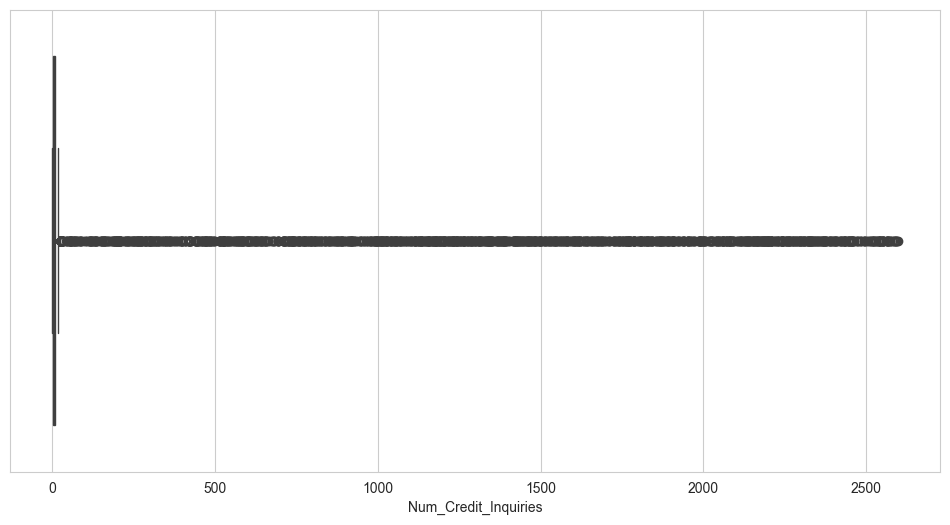

In [59]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries']);

### Credit_Mix

In [60]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    34131
Good        21741
Bad         17755
Name: count, dtype: int64

In [61]:
df.Credit_Mix.isna().sum()

18667

In [62]:
# Fill null values in 'Credit_Mix' with 'Unknown'
df['Credit_Mix'].fillna('Unknown', inplace=True)

df['Credit_Mix'].astype('object')

0        Unknown
3           Good
4           Good
5           Good
6           Good
          ...   
99995    Unknown
99996    Unknown
99997       Good
99998       Good
99999       Good
Name: Credit_Mix, Length: 92294, dtype: object

In [63]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    34131
Good        21741
Unknown     18667
Bad         17755
Name: count, dtype: int64

### Credit_History_Age

In [64]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    414
19 Years and 5 Months     408
19 Years and 3 Months     407
17 Years and 9 Months     407
15 Years and 9 Months     406
                         ... 
0 Years and 3 Months       19
33 Years and 7 Months      14
0 Years and 2 Months       13
33 Years and 8 Months      10
0 Years and 1 Months        1
Name: count, Length: 404, dtype: int64

In [65]:
df['Credit_History_Age'].isna().sum()

8356

In [66]:
# Group by 'Credit_Mix' and calculate mode for 'Credit_History_Age' within each group
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_History_Age' with the mode for each group
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)


In [67]:
df['Credit_History_Age'].isna().sum()

0

In [68]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
19 Years and 5 Months     3525
30 Years and 2 Months     2203
15 Years and 9 Months     2102
8 Years and 10 Months     1828
15 Years and 11 Months     414
                          ... 
0 Years and 3 Months        19
33 Years and 7 Months       14
0 Years and 2 Months        13
33 Years and 8 Months       10
0 Years and 1 Months         1
Name: count, Length: 404, dtype: int64

In [69]:
# Extract years and months from 'Credit_History_Age' column
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000,4.000,...,809.98,26.823,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2,22,1
3,23,Scientist,19114.12,3,4,3,4,5,4.000,4.000,...,809.98,31.378,No,49.575,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,2,22,4
4,23,Scientist,19114.12,3,4,3,4,6,31.203,4.000,...,809.98,24.797,No,49.575,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,2,22,5
5,23,Scientist,19114.12,3,4,3,4,8,4.000,4.000,...,809.98,27.262,No,49.575,62.430172331195294,!@9#%8,340.4792117872438,2,22,6
6,23,Scientist,19114.12,3,4,3,4,3,8.000,4.000,...,809.98,22.538,No,49.575,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,2,22,7


In [70]:
# Convert years to months and add with months to get total months
df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns
df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,3,7.000,4.000,Unknown,809.98,26.823,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2,265
3,23,Scientist,19114.12,3,4,3,4,5,4.000,4.000,Good,809.98,31.378,No,49.575,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,2,268
4,23,Scientist,19114.12,3,4,3,4,6,31.203,4.000,Good,809.98,24.797,No,49.575,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,2,269
5,23,Scientist,19114.12,3,4,3,4,8,4.000,4.000,Good,809.98,27.262,No,49.575,62.430172331195294,!@9#%8,340.4792117872438,2,270
6,23,Scientist,19114.12,3,4,3,4,3,8.000,4.000,Good,809.98,22.538,No,49.575,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,2,271


### Payment_of_Min_Amount

In [71]:
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    48966
No     32262
NM     11066
Name: count, dtype: int64

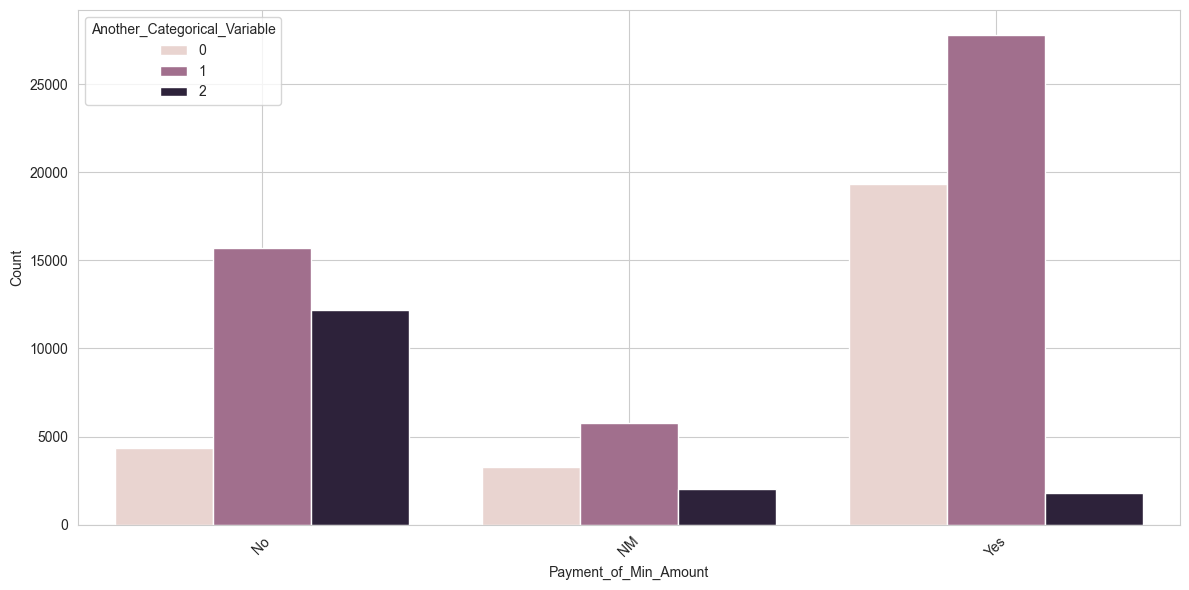

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

### Amount_invested_monthly

In [73]:
df.Amount_invested_monthly.nunique()

84073

In [74]:
non_numeric_values(df, 'Amount_invested_monthly')

{'.', 'nan'}

In [75]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].unique()

array([], dtype=float64)

In [76]:
df.Amount_invested_monthly.value_counts().head(15)

Amount_invested_monthly
10000.000    3941
0.000         154
80.415          1
82.081          1
145.409         1
96.327          1
157.643         1
89.570          1
51.802          1
98.026          1
145.016         1
129.361         1
119.764         1
323.629         1
108.036         1
Name: count, dtype: int64

In [77]:
df[df.Amount_invested_monthly.isna()].sample(15)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
82474,17,Mechanic,61533.36,8,1265,9,5,22,18.000,6.000,Unknown,1029.35,34.383,Yes,251.523,NaN,HighspentMediumvaluepayments,311.77559567051264,1,175
40184,39,Mechanic,37421.88,2,4,9,3,6,14.000,2.000,Good,1083.06,23.114,No,59.189,NaN,HighspentMediumvaluepayments,408.1250582039864,1,359
66820,39,Scientist,20886.73,5,5,12,4,13,8.000,0.000,Good,769.43,32.790,No,39.690,NaN,HighspentMediumvaluepayments,337.4899334576363,1,392
10736,42,Other,36690.32,3,3,9,6,10,17.000,4.000,Standard,874.85,34.024,Yes,134.088,NaN,HighspentLargevaluepayments,349.37446555202035,1,195
42967,34,Manager,36068.94,8,5,13,4,30,17.000,10.000,Standard,2208.99,36.477,Yes,89.067,NaN,HighspentMediumvaluepayments,349.46587477841746,1,231
69403,43,MediaManager,14535.49,7,10,22,8,57,16.000,13.000,Bad,3607.6,30.535,Yes,53.039,NaN,LowspentMediumvaluepayments,292.51498017145593,0,47
98131,35,Musician,30619.56,5,7,16,6,9,20.000,6.000,Standard,711.08,40.227,Yes,137.793,NaN,LowspentSmallvaluepayments,111.68820974383738,0,151
29275,36,Musician,64173.56,7,4,11,2,12,17.000,2.000,Standard,497.23,39.446,No,68.349,NaN,LowspentSmallvaluepayments,301.1574294685698,1,360
69831,39,Journalist,17698.23,6,9,18,7,31,22.000,14.000,Bad,4603.45,35.811,Yes,73.666,NaN,LowspentMediumvaluepayments,295.910196057608,0,66
83030,38,Writer,47032.8,8,3,16,3,19,8.000,7.000,Standard,1901.62,32.304,Yes,103.379,NaN,LowspentLargevaluepayments,207.66570503847854,1,211


In [78]:
df = knn_impute_column(df, 'Amount_invested_monthly')

In [79]:
df.Amount_invested_monthly.isna().sum()

0

In [80]:
df.Amount_invested_monthly.value_counts().head(10)

Amount_invested_monthly
633.430      4128
10000.000    3941
0.000         154
80.415          1
82.081          1
145.409         1
96.327          1
157.643         1
89.570          1
51.802          1
Name: count, dtype: int64

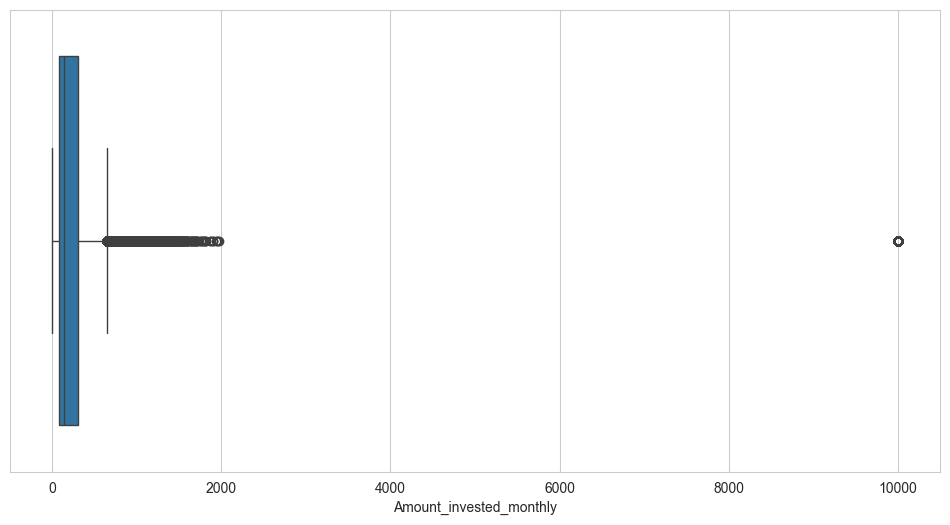

In [81]:
sns.boxplot(data= df, x = df['Amount_invested_monthly']);

In [82]:
df[df['Amount_invested_monthly'] == 10000]['Amount_invested_monthly'].count()

3941

### Payment_Behaviour

In [83]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      23661
HighspentMediumvaluepayments    16179
LowspentMediumvaluepayments     12777
HighspentLargevaluepayments     12569
HighspentSmallvaluepayments     10468
LowspentLargevaluepayments       9646
!@9#%8                           6994
Name: count, dtype: int64

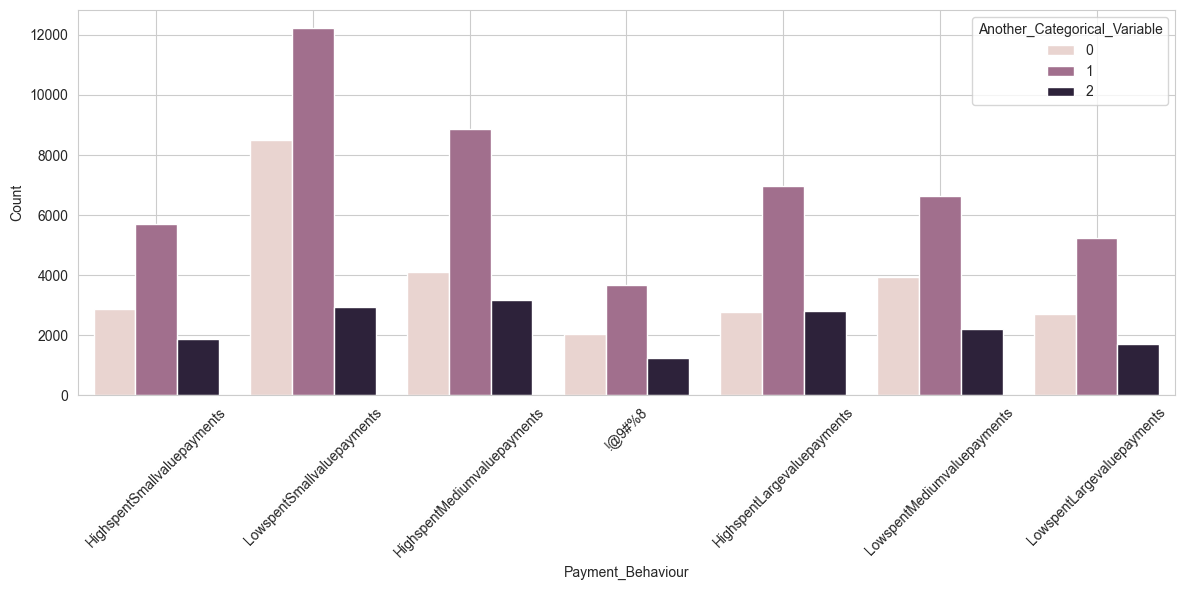

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
# Replace '!@9#%8' with NaN
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode
mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)


In [86]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      30655
HighspentMediumvaluepayments    16179
LowspentMediumvaluepayments     12777
HighspentLargevaluepayments     12569
HighspentSmallvaluepayments     10468
LowspentLargevaluepayments       9646
Name: count, dtype: int64

In [87]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      30655
High_spent_Medium_value_payments    16179
Low_spent_Medium_value_payments     12777
High_spent_Large_value_payments     12569
High_spent_Small_value_payments     10468
Low_spent_Large_value_payments       9646
Name: count, dtype: int64

### Monthly_Balance

In [88]:
df.Monthly_Balance.isna().sum()

1123

In [89]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [90]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()

9

In [91]:
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)

In [92]:
df['Monthly_Balance'].value_counts().head(15)

Monthly_Balance
312.494    1
286.520    1
395.106    1
440.468    1
411.910    1
397.622    1
327.670    1
399.045    1
355.826    1
199.857    1
304.184    1
539.684    1
614.241    1
519.046    1
494.545    1
Name: count, dtype: int64

In [93]:
df['Monthly_Balance'].max()

1602.0405189622518

In [94]:
df['Monthly_Balance'].min()

0.0077596647753352

In [95]:
df['Monthly_Balance'].mean()

401.10228551214993

In [96]:
df = knn_impute_column(df, 'Monthly_Balance')
df.Monthly_Balance.isna().sum()

0

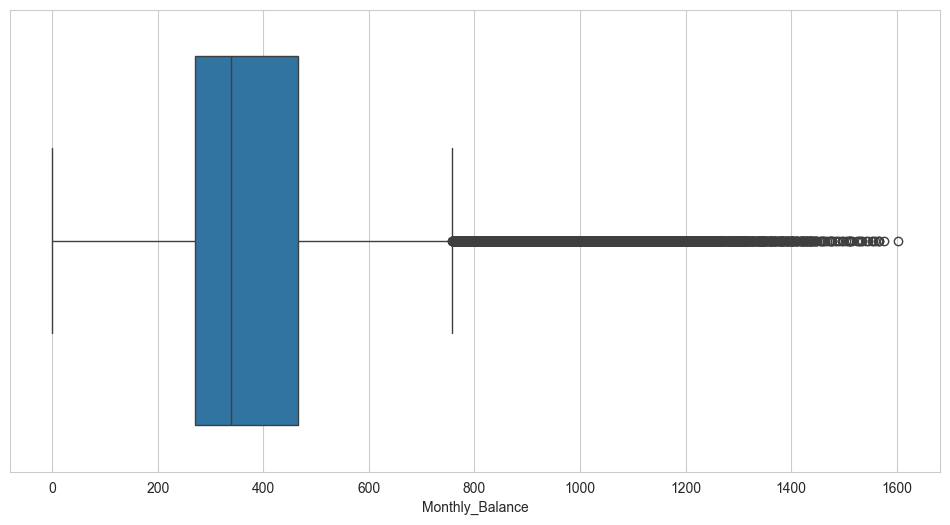

In [97]:
sns.boxplot(df, x= df['Monthly_Balance']);

In [98]:
# lastly change wrong dtypes..
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92285 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Num_Bank_Accounts          92285 non-null  int64  
 4   Num_Credit_Card            92285 non-null  int64  
 5   Interest_Rate              92285 non-null  int64  
 6   Num_of_Loan                92285 non-null  int64  
 7   Delay_from_due_date        92285 non-null  int64  
 8   Num_of_Delayed_Payment     92285 non-null  float64
 9   Num_Credit_Inquiries       92285 non-null  float64
 10  Credit_Mix                 92285 non-null  object 
 11  Outstanding_Debt           92285 non-null  float64
 12  Credit_Utilization_Ratio   92285 non-null  float64
 13  Payment_of_Min_Amount      92285 non-null  object 


### Monthly expenses

In [99]:
df['Monthly_expense'] = df['Annual_Income'] / 12 - df['Monthly_Balance']
df[df['Monthly_expense'] < 0]['Monthly_expense'].count()
df['Monthly_expense'] = df['Monthly_expense'].astype(float)

df.head()


,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Monthly_expense
0,23,Scientist,19114.120,3,4,3,4,3,7.000,4.000,...,809.980,26.823,No,49.575,80.415,High_spent_Small_value_payments,312.494,2,265,1280.349
3,23,Scientist,19114.120,3,4,3,4,5,4.000,4.000,...,809.980,31.378,No,49.575,199.458,Low_spent_Small_value_payments,223.451,2,268,1369.392
4,23,Scientist,19114.120,3,4,3,4,6,31.203,4.000,...,809.980,24.797,No,49.575,41.420,High_spent_Medium_value_payments,341.489,2,269,1251.354
5,23,Scientist,19114.120,3,4,3,4,8,4.000,4.000,...,809.980,27.262,No,49.575,62.430,Low_spent_Small_value_payments,340.479,2,270,1252.364
6,23,Scientist,19114.120,3,4,3,4,3,8.000,4.000,...,809.980,22.538,No,49.575,178.344,Low_spent_Small_value_payments,244.565,2,271,1348.278


# Visualisations

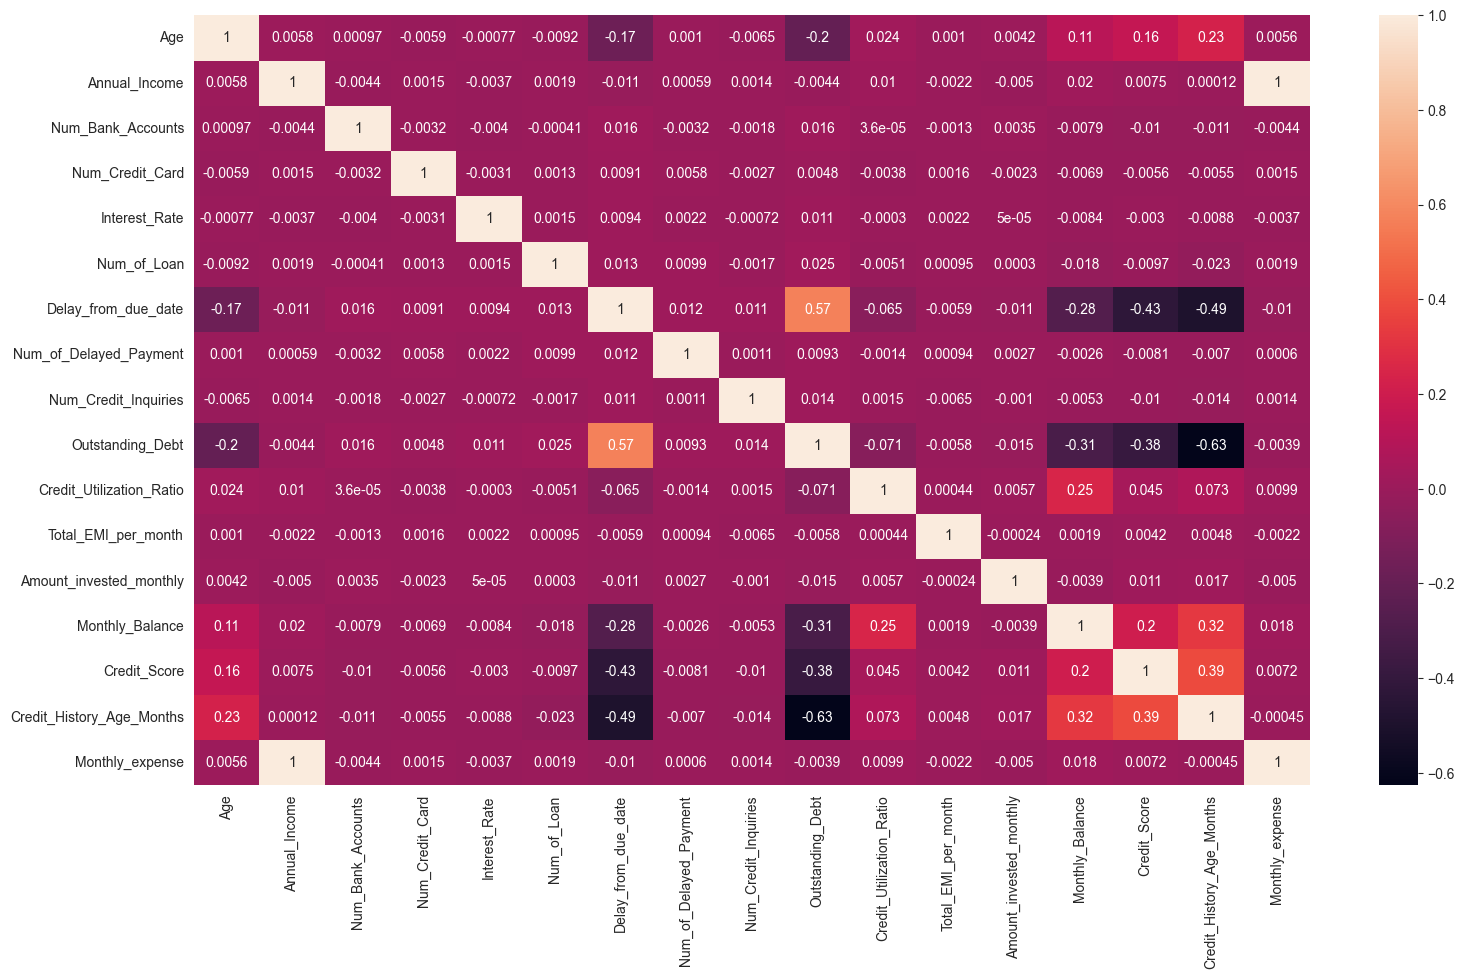

In [100]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True);

In [101]:
# sns.pairplot(df, corner=True);

# Save and read clean data

In [102]:
df.to_csv("Creditscore_train_cleaned.csv", index=False)

In [103]:
df = pd.read_csv(r"Creditscore_train_cleaned.csv")
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Monthly_expense
0,23,Scientist,19114.120,3,4,3,4,3,7.000,4.000,...,809.980,26.823,No,49.575,80.415,High_spent_Small_value_payments,312.494,2,265,1280.349
1,23,Scientist,19114.120,3,4,3,4,5,4.000,4.000,...,809.980,31.378,No,49.575,199.458,Low_spent_Small_value_payments,223.451,2,268,1369.392
2,23,Scientist,19114.120,3,4,3,4,6,31.203,4.000,...,809.980,24.797,No,49.575,41.420,High_spent_Medium_value_payments,341.489,2,269,1251.354
3,23,Scientist,19114.120,3,4,3,4,8,4.000,4.000,...,809.980,27.262,No,49.575,62.430,Low_spent_Small_value_payments,340.479,2,270,1252.364
4,23,Scientist,19114.120,3,4,3,4,3,8.000,4.000,...,809.980,22.538,No,49.575,178.344,Low_spent_Small_value_payments,244.565,2,271,1348.278
